# Metod de Newton-Raphson

In [5]:
import numpy as np
import matplotlib.pyplot as plt

## Funcion:
$f(x) = \exp(x - \sqrt{x}) - x$

In [6]:
def f(x):
    return np.exp(x - np.sqrt(x)) - x

def df_dx(x):
    return np.exp(x - np.sqrt(x)) * (1 - 1/(2*np.sqrt(x))) - 1

## Grafico

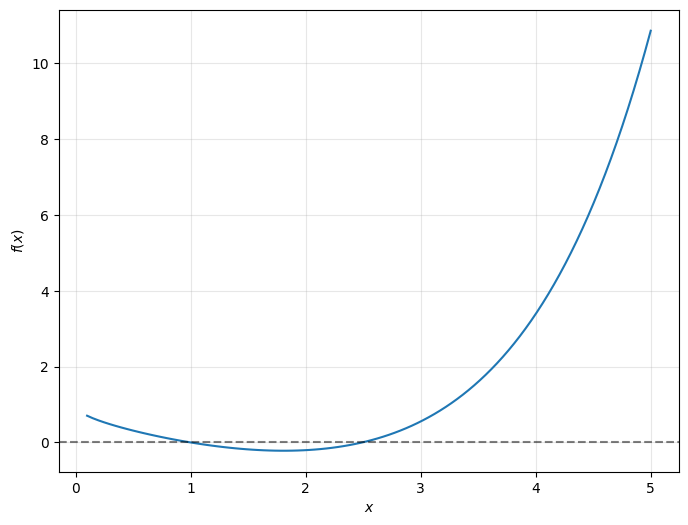

In [7]:
x = np.linspace(0.1, 5, 100)
y = f(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

## Funcion Newton-Raphson

In [8]:
def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    x = x0
    for i in range(max_iter):
        fx = f(x)
        if abs(fx) < tol:
            return x, i+1
        dfx = df(x)
        if abs(dfx) < 1e-12:
            print ("Derivada pequeña")
        x = x - fx / dfx
    print ("Maximo numero de iteraciones alcanzado")

In [9]:
# 4. Test the code
x0 = 0.1 # Initial guess
try:
    raiz, iteraciones = newton_raphson(f, df_dx, x0)
    print(f"Raiz: x = {raiz:.6f}")
    print(f"valor de la funcion: f({raiz:.6f}) = {f(raiz):.2e}")
    print(f"Iteraciones: {iteraciones}")
except:
   print("Error")

Raiz: x = 0.999998
valor de la funcion: f(0.999998) = 9.05e-07
Iteraciones: 5


## Convergencia

2.4909093823108828


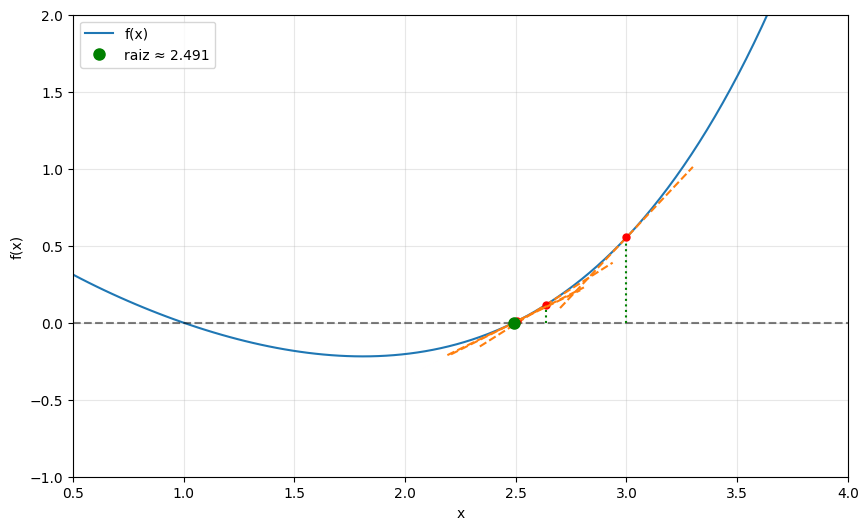

In [12]:
x0 = 3
x_vals = [x0]
x = x0

for i in range(iteraciones-1):
    x = x - f(x) / df_dx(x)
    x_vals.append(x)
print (x)
plt.figure(figsize=(10, 6))
x_plot = np.linspace(0.5, 4, 100)
y_plot = f(x_plot)

plt.plot(x_plot, y_plot, label='f(x)')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)

# Pasos
for i in range(len(x_vals)-1):
    xi = x_vals[i]
    yi = f(xi)
    pendiente = df_dx(xi)

    # Tangente
    x_tangent = np.linspace(xi-0.3, xi+0.3, 100)
    y_tangent = yi + pendiente * (x_tangent - xi)
    plt.plot(x_tangent, y_tangent, 'C1--')

    plt.plot([xi, xi], [0, yi], 'g:')

    # Puntos
    plt.plot(xi, yi, 'ro', markersize=5)

plt.plot(x_vals[-1], f(x_vals[-1]), 'go', markersize=8, label=f'raiz ≈ {x_vals[-1]:.3f}')
plt.xlim(0.5, 4)
plt.ylim(-1, 2)
plt.grid(True, alpha=0.3)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()